In [8]:
import os
import const
import matplotlib.pyplot as plt
import random

# installer tensorflow 2.10.0 et exactement cette version pour avoir le support du GPU

from PIL import Image
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras import Model
import numpy as np
import json


In [2]:
# on indique le dossier test du dataset d'entraînement
path_test = os.path.join(const.DATASET_CLEAN_PATH_WO_BG, 'test')

# on créer le générateur pour test
test_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# on charge les images et on les redimensionne
test_generator = test_data_generator.flow_from_directory(
    directory=path_test,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# on définit le nombre de classes du dataset chargé
n_class = test_generator.num_classes

# on définit l'architecture du modèle utilisé pour l'entrainement
base_model = EfficientNetB0(weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(rate=0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(rate=0.2)(x)
predictions = Dense(n_class, activation = 'softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# enlever ces deux lignes pour tester sur les modèles "freezed"
for layer in base_model.layers[-10:]: # il faut bien indiquer le même nombre de couches
    layer.trainable = True

# on charge les poids
model.load_weights('../models/model_B0_defroze.h5')

# on recupère les vrais labels
true_labels = test_generator.classes

# on récupère le chemin vers chaque image
images_paths = test_generator.filenames

# on fais la prédiction
pred = model.predict(test_generator)

# on récupère les valeurs les plus grandes pour obtenir les labels
pred_labels = np.argmax(pred, axis=1)

Found 11025 images belonging to 525 classes.


In [4]:
root_path = os.getcwd().split('\\')
# print(root_path)
while root_path[-1] != "reco_oiseau_jan24bds":
    root_path.pop()
    root_path = '\\'.join(root_path)
    os.chdir(root_path)
os.getcwd()
from prod_script.ModelBuilder import ModelBuilder

In [5]:
# on indique le dossier test du dataset d'entraînement
path_test = "data\\dataset_birds_wo_background\\test"

# on créer le générateur pour test
test_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# on charge les images et on les redimensionne
test_generator = test_data_generator.flow_from_directory(
    directory=path_test,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)
print("ModelBuilder : Attention à la fenêtre qui peut s'ouvrir derrière pour préciser le fichier de poids")
model = ModelBuilder.load_B0_523_DataAugment_Equilibre_Categorical(path_test)
# on définit le nombre de classes du dataset chargé
n_class = test_generator.num_classes

# on recupère les vrais labels
true_labels = test_generator.classes
# on récupère le chemin vers chaque image
images_paths = test_generator.filenames

# on fais la prédiction
pred = model.predict(test_generator)
# on récupère les valeurs les plus grandes pour obtenir les labels
pred_labels = np.argmax(pred, axis=1)

Found 10983 images belonging to 523 classes.
Modelbuilder
Found 10983 images belonging to 523 classes.
truelabel recup
filenamerecu^p
Début de pred
344/344 [==============================] - 229s 644ms/step
Fin de pred


NORTHERN FLICKER\86.jpg
NORTHERN FULMAR\5.jpg
NORTHERN GANNET\12.jpg
NORTHERN GOSHAWK\103.jpg


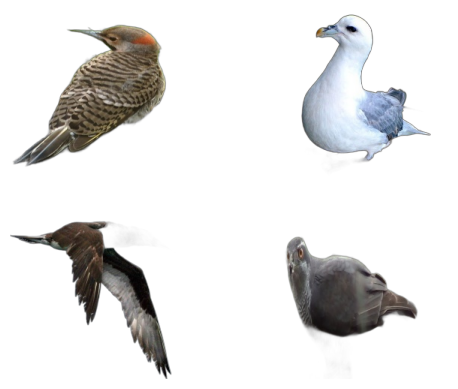

In [2]:
# une liste des liens vers les images qui ont été mal classées
missed_pred = []

# on parcours les listes avec les labels prédits, les vrais labels et les chemins vers les images
for img_nbr, (real_class, image_path, pred_class) in enumerate(zip(true_labels, images_paths, pred_labels)):
    # si la classe prédite n'est pas la bonne classe, on ajoute le chemin de l'image dans notre liste
    if real_class != pred_class:
        missed_pred.append(image_path)

# on fait une sélection aléatoire du début de la plage de sélection
debut_selection = random.randint(0, (len(missed_pred) - 4)) # sachant qu'on sélectionne 4 images APRÈS le début de la plage, il faut être 4 images avant la fin de la liste au maximum

# on créer une grille pour graphiques
fig, axs = plt.subplots(2, 2)

# on simplifie la sélection d'une position dans la grille
ax_flat = axs.flatten()

# on affiche 4 images aléatoires qui ont été mal classées
for iteration, image in enumerate(missed_pred[debut_selection:debut_selection + 4]):
    print(image)
    image_path = os.path.join(path_test, image)
    img = Image.open(image_path)

    # on incrémente via itération pour chaque image pour changer leur placement sur la grille
    ax_flat[iteration].imshow(img)
    
    # on supprime les abscisses et ordonnées
    ax_flat[iteration].axis('off')
   


In [11]:
# une liste des liens vers les images qui ont été mal classées
missed_pred = list()
success_pred = list()

# on parcours les listes avec les labels prédits, les vrais labels et les chemins vers les images
for img_nbr, (real_class, image_path, pred_class) in enumerate(zip(true_labels, images_paths, pred_labels)):
    # si la classe prédite n'est pas la bonne classe, on ajoute le chemin de l'image dans notre liste
    if real_class != pred_class:
        missed_pred.append(image_path)
    else :
        success_pred.append(image_path)
   
preddict = {"success_pred" : success_pred, "missed_pred":missed_pred}
with open('predictions22.json', 'w') as f:
    json.dump(preddict, f)

10514
469
